# Kickstarter Projects
#TODO: what is kickstarter...
## 1.Data preparation and cleaning
## Import Python Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display
import seaborn as sns

# need to install
#conda install -c konstantinstadler country_converter
import country_converter as coco # a country converter

#conda install -c anaconda nltk
import nltk # for NLP
#ltk.download('stopwords')

## Data preperation

In [2]:
df = pd.read_csv("ks-projects-201801.csv")
df.head(5)

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [89]:
df.columns #let's see which columns there are

Index(['name', 'category', 'main_category', 'deadline', 'launched', 'state',
       'country', 'usd_pledged_real', 'usd_goal_real', 'duration',
       'country_GDP'],
      dtype='object')

## Drop Unnecessary Columns

TODO: explain why we dropped this...

In [4]:
df = df.drop('backers', axis = 1) #TODO: explain
df = df.drop('usd pledged', axis = 1) #there is usd_pledged_real
df = df.drop('currency', axis = 1)    # TODO: explain
df = df.drop('goal', axis = 1)    # TODO: explain
df = df.drop('pledged', axis = 1)    # TODO: explain
df = df.drop('ID', axis = 1)    # TODO: explain

In [5]:
df.head(3)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11 12:12:28,failed,GB,0.0,1533.95
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02 04:43:57,failed,US,2421.0,30000.00
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12 00:20:50,failed,US,220.0,45000.00


## Drop Unnecessary rows
TODO: explain...

In [6]:
# Drop live projects
df = df.query('state != "live"')

# Drop project with ' N,0" ' country
df = df.query("country != 'N,0\"' ")

TODO: change it...
When examine the dataset, we paid attention that there are few rows that their launchdate was wrong.

In [7]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()

df[['name','deadline','launched']].nsmallest(10, 'launched')

,name,deadline,launched
2842,Salt of the Earth: A Dead Sea Movie (Canceled),2010-09-15,1970-01-01
48147,1st Super-Size Painting - Social Network Owned...,2010-08-14,1970-01-01
75397,"""ICHOR"" (Canceled)",2010-05-21,1970-01-01
94579,"Support Solo Theater! Help ""Ungrateful Daughte...",2010-06-01,1970-01-01
247913,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",2010-05-04,1970-01-01
273779,Identity Communications Infographic (Canceled),2010-04-10,1970-01-01
319002,Student Auditions Music 2015,2015-10-31,1970-01-01
169268,Grace Jones Does Not Give A F$#% T-Shirt (limi...,2009-05-31,2009-04-21
322000,CRYSTAL ANTLERS UNTITLED MOVIE,2009-07-20,2009-04-23
138572,drawing for dollars,2009-05-03,2009-04-24


Let's remove them.

In [8]:
df = df.query('launched > "2008-01-01"')

## Impute missing values

We want to see how many missing values we have - complete them, or ignore this rows.
We found we have only 4 rows with missing values so we remove them.

In [9]:
# get the number of missing data points per column
missing_values_count = df.isnull().sum()
# look at the # of missing points in the first ten columns
print(missing_values_count[0:23])
# how many total missing values do we have?
total_cells = np.product(df.shape)
total_missing = missing_values_count.sum()
print(total_missing)

name                4
category            0
main_category       0
deadline            0
launched            0
state               0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64
4


In [10]:
# remove all columns with at least one missing value
df = df.dropna()

## Insert New Columns

First, we want to add a 'Duration' column

In [11]:
df['duration'] = pd.to_datetime(df['deadline'], )-pd.to_datetime(df['launched']).dt.normalize()

## Convert Columns #TODO: happened before...

In [12]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['launched'] = pd.to_datetime(df['launched']).dt.normalize()
df.head(5)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real,duration
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,GB,0.0,1533.95,59 days
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,US,2421.0,30000.00,60 days
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,US,220.0,45000.00,45 days
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,US,1.0,5000.00,30 days
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04,canceled,US,1283.0,19500.00,56 days


## Integrate with outsource DataSets
TODO: explain about the dataset
TODO: fix the explantation
We want to add a country's GDP column.
The country name in Kickstarter's dataset and the GDP dataset are different - so we need no create a translation table.<br>
countries_names_dict = {kickstarter_country : coco_country}<br>
countries_GDP_dict   = {GDP_country : GDP}<br>
(*) Pay attention, GDP_country == coco_country<br>
original_name_countries_GDP_dict = {kickstarter_country : GDP}

In [13]:
countries_list = list(pd.unique(df.country))
#print(countries_list)

countries_names_dict = {}
i=0
for country in countries_list:
    l = [country]
    country_converted_name = coco.convert(names=l,to='name_short')
    countries_names_dict[country] = country_converted_name

print(countries_names_dict)

countries_GDP = pd.read_csv("ks_countries_gdp.csv")
countries_GDP_dict = pd.Series(countries_GDP['GDP ($ per capita)'].values,countries_GDP.Country).to_dict()

print()
#print(countries_GDP_dict)
#print()

original_name_countries_GDP_dict = {}
for country in countries_names_dict:
    #print(countries_names_dict[country])
    original_name_countries_GDP_dict[str(country)] = countries_GDP_dict[countries_names_dict[country] + ' ']
print(original_name_countries_GDP_dict)

{'GB': 'United Kingdom', 'US': 'United States', 'CA': 'Canada', 'AU': 'Australia', 'NO': 'Norway', 'IT': 'Italy', 'DE': 'Germany', 'IE': 'Ireland', 'MX': 'Mexico', 'ES': 'Spain', 'SE': 'Sweden', 'FR': 'France', 'NL': 'Netherlands', 'NZ': 'New Zealand', 'CH': 'Switzerland', 'AT': 'Austria', 'DK': 'Denmark', 'BE': 'Belgium', 'HK': 'Hong Kong', 'LU': 'Luxembourg', 'SG': 'Singapore', 'JP': 'Japan'}

{'GB': 27700.0, 'US': 37800.0, 'CA': 29800.0, 'AU': 29000.0, 'NO': 37800.0, 'IT': 26700.0, 'DE': 27600.0, 'IE': 29600.0, 'MX': 9000.0, 'ES': 22000.0, 'SE': 26800.0, 'FR': 27600.0, 'NL': 28600.0, 'NZ': 21600.0, 'CH': 32700.0, 'AT': 30000.0, 'DK': 31100.0, 'BE': 29100.0, 'HK': 28800.0, 'LU': 55100.0, 'SG': 23700.0, 'JP': 28200.0}


Let's add the column.

In [14]:
df = df.assign(country_GDP = lambda x: x['country'])
df.replace({'country_GDP': original_name_countries_GDP_dict}, inplace=True)
df.head(5)

,name,category,main_category,deadline,launched,state,country,usd_pledged_real,usd_goal_real,duration,country_GDP
0,The Songs of Adelaide & Abullah,Poetry,Publishing,2015-10-09,2015-08-11,failed,GB,0.0,1533.95,59 days,27700.0
1,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,2017-11-01,2017-09-02,failed,US,2421.0,30000.00,60 days,37800.0
2,Where is Hank?,Narrative Film,Film & Video,2013-02-26,2013-01-12,failed,US,220.0,45000.00,45 days,37800.0
3,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,2012-04-16,2012-03-17,failed,US,1.0,5000.00,30 days,37800.0
4,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,2015-08-29,2015-07-04,canceled,US,1283.0,19500.00,56 days,37800.0


TODO: explain add the dataset...

## Specifying Data Types

In [15]:
#binary_variables = ['class']
categorical_variables = ['category', 'main_category', 'state', 'country']
numeric_variables = ['usd_pledged_real','usd_goal_real']
date_time_variables = ['deadline','launched','duration']

## Type Conversion

In [16]:
#TODO: Specifying Data Types, Type Conversion, Categorical and Binary Variables to String

In [17]:
df[categorical_variables].dtypes

category         object
main_category    object
state            object
country          object
dtype: object

In [18]:
df[numeric_variables].dtypes

usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [19]:
df[date_time_variables].dtypes

deadline     datetime64[ns]
launched     datetime64[ns]
duration    timedelta64[ns]
dtype: object

## Remove Whitespaces

In [20]:
# Map(func,sequence) -  operates a function on a sequence
# Lambda var1,var2.. : Expression -  Creates an inline function
for variable in categorical_variables:
    df[variable] = df[variable].map(lambda x : x.strip())

## Binarize State label

In [21]:
df['state'] = df['state'].map(lambda x : '1' if x == 'successful' else '0')

## Data Statistics

In [22]:
df.describe()

##TODO: need to remove the huge duration...

,usd_pledged_real,usd_goal_real,duration,country_GDP
count,3.720550e+05,3.720550e+05,372055,372055.000000
mean,9.145509e+03,4.573831e+04,34 days 04:12:09.840480,35608.566475
std,9.162231e+04,1.151699e+06,12 days 19:02:33.006067,4445.312523
min,0.000000e+00,1.000000e-02,1 days 00:00:00,9000.000000
25%,3.125000e+01,2.000000e+03,30 days 00:00:00,37800.000000
50%,6.279700e+02,5.500000e+03,30 days 00:00:00,37800.000000
75%,4.066000e+03,1.600000e+04,37 days 00:00:00,37800.000000
max,2.033899e+07,1.663614e+08,92 days 00:00:00,55100.000000


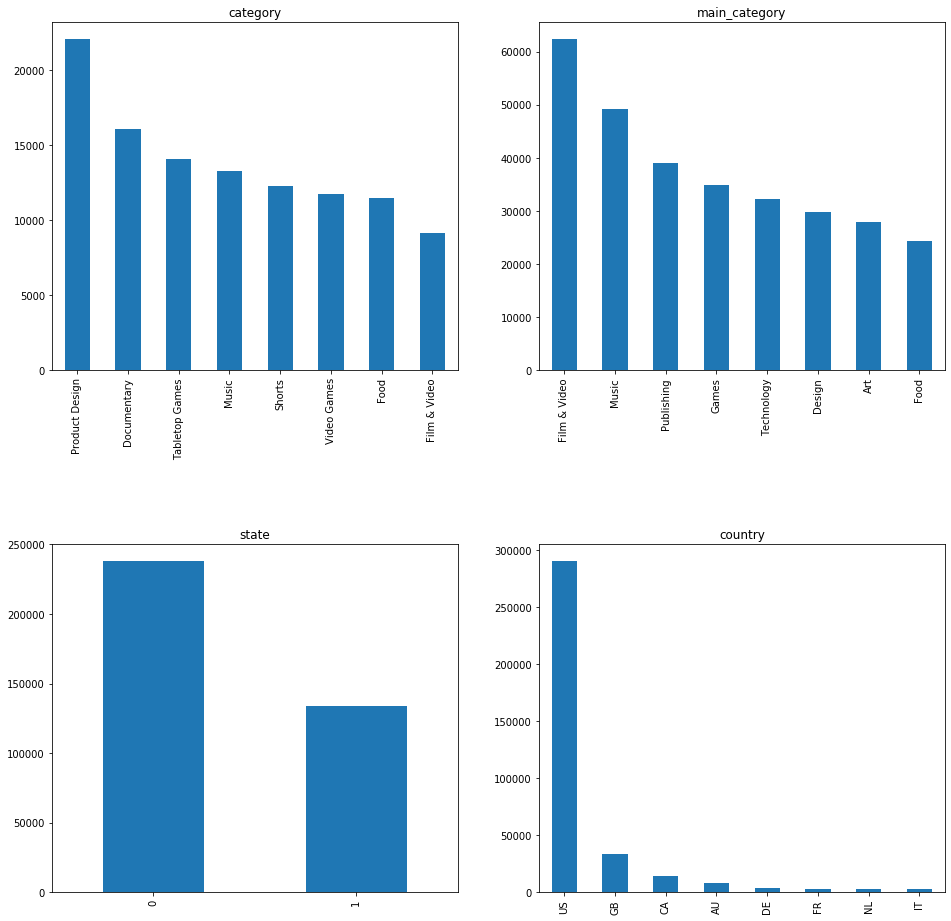

In [23]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
i=0
n=len(categorical_variables)
for variable in categorical_variables:
    r=int(i/2)
    c=i%2
    i+=1
    u=min(len(df[variable].unique()),8)
    df[variable].value_counts()[:u].plot(kind='bar',ax=axes[r,c],title=variable)

## Class Distribution

In [24]:
print (df['state'].value_counts())
print (df['state'].value_counts(normalize='True'))

0    238204
1    133851
Name: state, dtype: int64
0    0.640239
1    0.359761
Name: state, dtype: float64


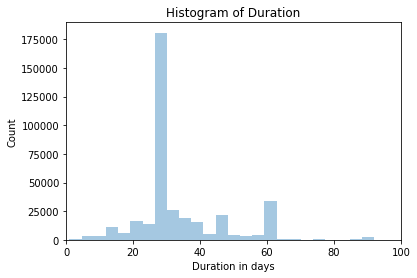

In [25]:
%matplotlib inline
sns.distplot(df['duration'].dt.days, bins = 25, kde = False).set(xlim=(0, 100))
plt.title('Histogram of Duration')
plt.xlabel('Duration in days')
plt.ylabel('Count')
plt.show()

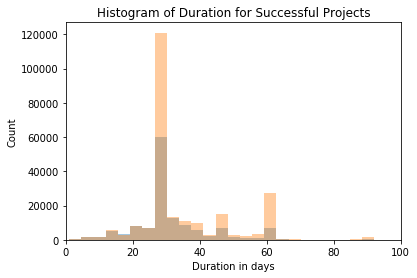

In [26]:
# can be removed...

sns.distplot(df.query('state != "0"')['duration'].dt.days,  bins = 25, kde = False).set(xlim=(0, 100))
sns.distplot(df.query('state != "1"')['duration'].dt.days,  bins = 25, kde = False).set(xlim=(0, 100))
plt.title('Histogram of Duration for Successful Projects')
plt.xlabel('Duration in days')
plt.ylabel('Count')
plt.show()

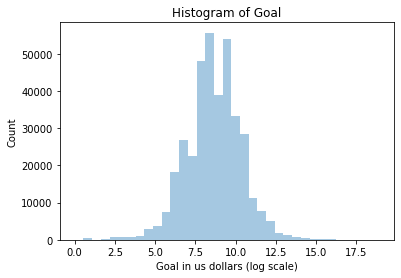

In [27]:
%matplotlib inline
sns.distplot(np.log1p(df['usd_goal_real']), bins = 35, kde = False)
plt.title('Histogram of Goal')
plt.xlabel('Goal in us dollars (log scale)')
plt.ylabel('Count')
plt.show()

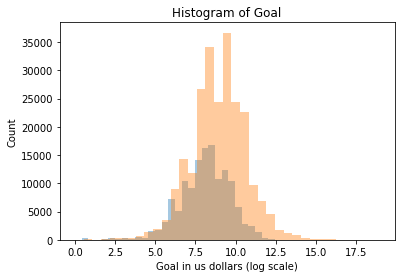

In [28]:
# TODO: make this histogram better

sns.distplot(np.log1p(df.query('state != "0"')['usd_goal_real']), bins = 35, kde = False)
sns.distplot(np.log1p(df.query('state != "1"')['usd_goal_real']), bins = 35, kde = False)
plt.title('Histogram of Goal')
plt.xlabel('Goal in us dollars (log scale)')
plt.ylabel('Count')
plt.show()

## Analyzing 'name' column - DRAFT!!!

We want to analyze and check if the name of the project has influence on the success rate.

We noticed more then 20k rows contains '(Canceled)' in their name.
Probably was changed by the owners after cancelling the project and opening a new one.
TODO: explain...

In [29]:
freq = pd.Series(' '.join(df['name']).split()).value_counts()[:10]
freq

The           61774
-             53415
the           33698
of            32988
A             28526
and           23428
(Canceled)    23093
a             20532
for           19618
&             17578
dtype: int64

Let's remove this "clue".

In [30]:
df['name']= df['name'].str.replace("\(Canceled\)","")
freq = pd.Series(' '.join(df['name']).split()).value_counts()[:10]
freq

The    61774
-      53415
the    33698
of     32988
A      28526
and    23428
a      20532
for    19618
&      17578
to     16640
dtype: int64

In [31]:
sub_df = df
sub_df = sub_df.drop('category', axis = 1)
sub_df = sub_df.drop('main_category', axis = 1)
sub_df = sub_df.drop('deadline', axis = 1)
sub_df = sub_df.drop('launched', axis = 1)
#sub_df = sub_df.drop('state', axis = 1)
sub_df = sub_df.drop('country_GDP', axis = 1)
sub_df = sub_df.drop('usd_pledged_real', axis = 1)
sub_df = sub_df.drop('usd_goal_real', axis = 1)
sub_df = sub_df.drop('duration', axis = 1)
sub_df = sub_df.drop('country', axis = 1)

In [32]:
sub_df.columns

Index(['name', 'state'], dtype='object')

Let's examine name's char count:

In [33]:
sub_df['char_count'] = sub_df['name'].str.len() ## this also includes spaces
#sub_df[['name','char_count']].head()

Let's examine the number of words in the name:

In [34]:
sub_df['word_count'] = sub_df['name'].apply(lambda x: len(str(x).split(" ")))
sub_df.head()
sub_df.nlargest(10, 'word_count')


,name,state,char_count,word_count
209039,To Die For Mandy ...,0,60,41
272623,A SAFER USB C...,0,60,37
281301,WATCHMAKING PRO...,0,50,33
123932,Elk Hunting In The R...,0,60,32
221501,food truck ambrosia...,0,57,32
207925,"Best at Sea ""The Pilot""",0,47,29
375537,C A N D E L A B R U M | L i g h t . C h i l l ...,0,57,29
9993,Shelby and the Bread Factory ...,0,60,28
79595,Under the Western Sun - The Ret...,1,85,28
172359,The Joint - Get High On Our...,0,60,28


We want to extract the average word length of each 'Name'. So we simply take the sum of the length of all the words and divide it by the total length in the 'Name'.

In [35]:
#pay attention - if rerun after There's a var called 'sum' - it might failed.

def avg_word(sentence):
    words = sentence.split()
    if (len(words)==0):
        return 0
    return (sum(len(word) for word in words))/len(words)

sub_df['avg_word'] = sub_df['name'].apply(lambda x: avg_word(x))
sub_df.head()

,name,state,char_count,word_count,avg_word
0,The Songs of Adelaide & Abullah,0,31,6,4.333333
1,Greeting From Earth: ZGAC Arts Capsule For ET,0,45,8,4.750000
2,Where is Hank?,0,14,3,4.000000
3,ToshiCapital Rekordz Needs Help to Complete Album,0,49,7,6.142857
4,Community Film Project: The Art of Neighborhoo...,0,58,8,6.375000


We want to remove some stopwords #TODO: explain

In [36]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
print (stop)
sub_df['stopwords'] = sub_df['name'].apply(lambda x: len([x for x in x.split() if x in stop]))
sub_df[['name','stopwords']].head()

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

,name,stopwords
0,The Songs of Adelaide & Abullah,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,0
2,Where is Hank?,1
3,ToshiCapital Rekordz Needs Help to Complete Album,1
4,Community Film Project: The Art of Neighborhoo...,1


In [37]:
sub_df.head()

,name,state,char_count,word_count,avg_word,stopwords
0,The Songs of Adelaide & Abullah,0,31,6,4.333333,1
1,Greeting From Earth: ZGAC Arts Capsule For ET,0,45,8,4.750000,0
2,Where is Hank?,0,14,3,4.000000,1
3,ToshiCapital Rekordz Needs Help to Complete Album,0,49,7,6.142857,1
4,Community Film Project: The Art of Neighborhoo...,0,58,8,6.375000,1


## PreProcessing

## Lowercase

Move to lowercase #TODO: explain
The first pre-processing step which we will do is transform our names into lower case. This avoids having multiple copies of the same words. For example, while calculating the word count, ‘Analytics’ and ‘analytics’ will be taken as different words.

In [38]:
sub_df['name'] = sub_df['name'].apply(lambda x: " ".join(x.lower() for x in x.split()))

## Removing Punctuation

Remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.


In [39]:
sub_df['name'] = sub_df['name'].str.replace('[^\w\s]','')

## Removal of stopwords

stop words (or commonly occurring words) should be removed from the text data. For this purpose, we can use predefined libraries.

In [40]:
stop = stopwords.words('english')
sub_df['name'] = sub_df['name'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

## Stemming
#TODO: change to linerize and not stemming

In [41]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()
for name in sub_df['name']:
    name = ps.stem(name)

In [42]:
#current_df = df
#current_df = current_df.query('state != "0"')
#df = df.query('state != "live"')
success_freq = pd.Series(' '.join(sub_df.query('state != "0"')['name']).split()).value_counts()
total_sum = 0
for frequency in success_freq:
    total_sum += frequency
    
print("Thera are total", success_freq.size, "different words.")
success_freq = success_freq[:100]
sum = 0
for frequency in success_freq:
    sum += frequency
    
print("Top 100 are", sum, "from total of", total_sum, "occurences, which are {0:.2f}%".format(sum/total_sum*100))

#freq1 = success_freq

Thera are total 82127 different words.
Top 100 are 126462 from total of 606736 occurences, which are 20.84%


In [43]:
failed_freq = pd.Series(' '.join(sub_df.query('state != "1"')['name']).split()).value_counts()
total_sum = 0
for frequency in failed_freq:
    total_sum += frequency
    
print("Thera are total", failed_freq.size, "different words.")
failed_freq = failed_freq[:100]
sum = 0
for frequency in failed_freq:
    sum += frequency
    
print("Top 100 are", sum, "from total of", total_sum, "occurences, which are {0:.2f}%".format(sum/total_sum*100))

# TODO: fix the prints
#freq2 = failed_freq

Thera are total 122837 different words.
Top 100 are 176521 from total of 972646 occurences, which are 18.15%


In [44]:
mydiff = [suc for suc in success_freq.keys() if suc not in failed_freq.keys()]
print(mydiff)

['edition', 'dance', 'release', 'presents', 'recording', 'full', 'rpg', 'season', 'issue', '3', 'fantasy', 'vinyl', 'theatre', 'musical', 'volume', '2014', 'length', 'enamel', 'two', 'comedy', 'graphic', 'dice', '2013', 'horror', 'wallet', '2015', 'dark', '2012', 'last', 'watch', 'summer']


In [45]:
#conda install -c conda-forge wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

## Most frequencied words in Failed Projects
TODO: change to bad colors

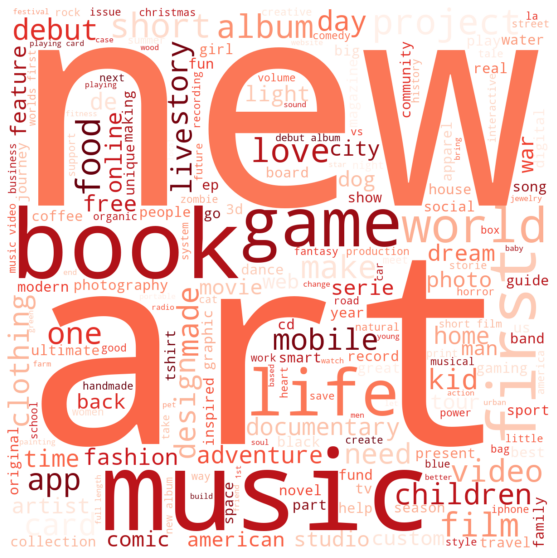

In [90]:
# Start with one review:
new_df = sub_df.query('state != "1"')
my_text = ' '
for name in new_df['name']:
    #print(name)
    my_text = my_text + name
    #text = sub_df['name'][0]
    
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                min_font_size = 10, colormap="Reds").generate(my_text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Most frequencied words in Succesful Projects
TODO: change to good colors

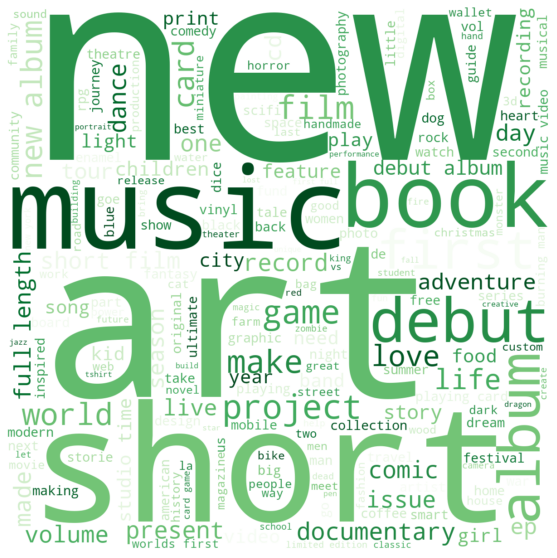

In [91]:
# Start with one review:
new_df = sub_df.query('state != "0"')
my_text = ' '
for name in new_df['name']:
    #print(name)
    my_text = my_text + name
    #text = sub_df['name'][0]
    
# Create and generate a word cloud image:
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white', 
                min_font_size = 10,colormap="Greens").generate(my_text)

# Display the generated image:
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [48]:
T = 30
diff_words = [[0] * T for i in range(T)]

for top_suc in range(T):
    for top_fail in range(T):
        val = len([suc for suc in success_freq[:top_suc].keys() if suc not in failed_freq[:top_fail].keys()])
        diff_words[top_suc][top_fail] = val
        
diff_words2 = [[0] * T for i in range(T)]

for top_fail in range(T):
    for top_suc in range(T):
        val = len([fail for fail in failed_freq[:top_fail].keys() if fail not in success_freq[:top_suc].keys()])
        diff_words2[top_suc][top_fail] = val

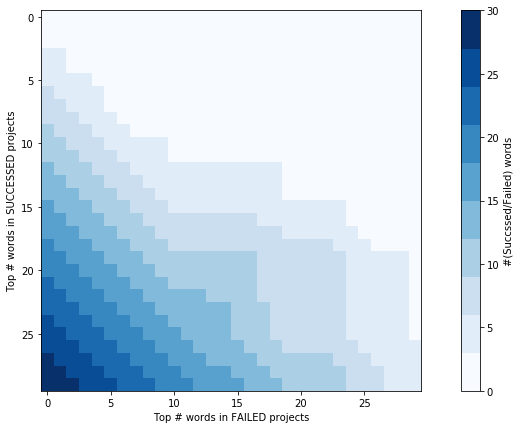

In [49]:
H = np.array(diff_words)
plt.figure( figsize=(14,7) )
plt.imshow(H, cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel("Top # words in FAILED projects")
plt.ylabel("Top # words in SUCCESSED projects")
plt.colorbar(label='#(Succssed/Failed) words')
plt.clim(0, T);
plt.show()

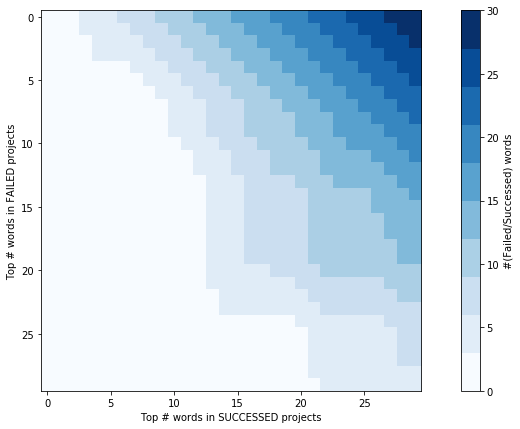

In [50]:
G = np.array(diff_words2)
plt.figure( figsize=(14,7) )
plt.imshow(G, cmap=plt.cm.get_cmap('Blues', 10))
plt.xlabel("Top # words in SUCCESSED projects")
plt.ylabel("Top # words in FAILED projects")
plt.colorbar(label='#(Failed/Successed) words')
plt.clim(0, T);
plt.show()

# TODO: nice graph of difference words between Success and Failed

## create two vars graph with colors
### 1) Top # success words
### 2) Top # failed words
### 3) color = diff


maybe precent from total words...
acctually need two graphs

TODO: analyze #chars, avg_words, #words

Let's examine the most successful words and most failed words

In [51]:
S = 50
F = 100
print("In the TOP-50 but not in the TOP-100:")
successed_words_list = [suc for suc in success_freq[:S].keys() if suc not in failed_freq[:F].keys()]
print("success words:",successed_words_list)

S = 70
F = 100
failed_words_list = [fail for fail in failed_freq[:S].keys() if fail not in success_freq[:F].keys()]
print("faild words:",failed_words_list)

In the TOP-50 but not in the TOP-100:
success words: ['edition', 'dance', 'release', 'presents', 'recording', 'full']
faild words: ['app', 'clothing', 'mobile', 'fashion', 'dream', 'design', 'apparel', 'suspended', 'journey', 'photography', 'system', 'way', 'online', 'social']


In [52]:
#str_to_search = 'app|clothing|mobile|fashion|dream'
#str_to_search = 'edition|dance|release|presents|recording|full'
success_words_to_search = '|'.join(successed_words_list)
failed_words_to_search = '|'.join(failed_words_list)


originaldf = df[['name','state']]
fdf = originaldf.query('state != "1"')
sdf = originaldf.query('state != "0"')
booldf = sdf['name'].str.contains(success_words_to_search)
success_project_by_success_words = np.sum(booldf)
booldf = fdf['name'].str.contains(success_words_to_search)
failed_project_by_success_words = np.sum(booldf)
print(success_project_by_success_words)
print(failed_project_by_success_words)

booldf = sdf['name'].str.contains(failed_words_to_search)
success_project_by_failed_words = np.sum(booldf)
booldf = fdf['name'].str.contains(failed_words_to_search)
failed_project_by_failed_words = np.sum(booldf)
print(success_project_by_failed_words)
print(failed_project_by_failed_words)


1869
1564
2556
6842


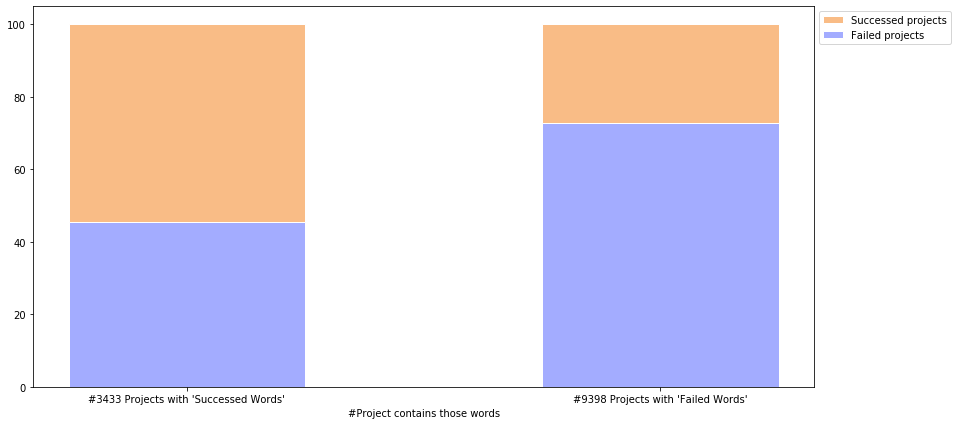

In [53]:
# Data
r = [0,1]
raw_data = {'orangeBars': [success_project_by_success_words, success_project_by_failed_words],
            'blueBars': [failed_project_by_success_words, failed_project_by_failed_words]}
plot_df = pd.DataFrame(raw_data)
 
# From raw value to percentage
totals = [i+j for i,j in zip(plot_df['orangeBars'], plot_df['blueBars'])]
orangeBars = [i / j * 100 for i,j in zip(plot_df['orangeBars'], totals)]
blueBars = [i / j * 100 for i,j in zip(plot_df['blueBars'], totals)]
 
# plot
barWidth = 0.5
A = "#" + str(success_project_by_success_words + failed_project_by_success_words) + " Projects with 'Successed Words'"
B = "#" + str(success_project_by_failed_words + failed_project_by_failed_words) + " Projects with 'Failed Words'"
names = (A,B)

# Create orange Bars
label1 = "Successed projects" 
plt.figure( figsize=(14,7) )
plt.bar(r, orangeBars, bottom=blueBars, color='#f9bc86', edgecolor='white', width=barWidth, label=label1)
# Create blue Bars
label2 = "Failed projects"
plt.bar(r, blueBars, color='#a3acff', edgecolor='white', width=barWidth, label=label2)
 
# Custom x axis
plt.xticks(r, names)
plt.xlabel("#Project contains those words")
 
# Add a legend
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

# Show graphic
plt.show()



Let's add this columns in our dataset

In [54]:
sub_df = sub_df.assign(contains_successed_words = lambda x: x['name'].str.contains(success_words_to_search))
sub_df = sub_df.assign(contains_failed_words = lambda x: x['name'].str.contains(failed_words_to_search))
sub_df.head(10)

,name,state,char_count,word_count,avg_word,stopwords,contains_successed_words,contains_failed_words
0,songs adelaide abullah,0,31,6,4.333333,1,False,False
1,greeting earth zgac arts capsule et,0,45,8,4.750000,0,False,False
2,hank,0,14,3,4.000000,1,False,False
3,toshicapital rekordz needs help complete album,0,49,7,6.142857,1,False,False
4,community film project art neighborhood filmma...,0,58,8,6.375000,1,False,False
5,monarch espresso bar,1,20,3,6.000000,0,False,False
6,support solar roasted coffee green energy sola...,1,60,9,6.500000,0,False,False
7,chaser strips strips make shots btch,0,49,8,5.250000,1,False,False
8,spin premium retractable inear headphones mic,0,53,8,5.750000,1,False,False
9,studio sky documentary feature film,0,47,10,4.222222,0,False,False


# was taken from another one...
https://www.kaggle.com/kosovanolexandr/kickstarter-lgbmclassifier-0-681

In [55]:
main_cats = df["main_category"].value_counts()
main_cats_failed = df[df["state"] == "1"]["main_category"].value_counts()
main_cats_sucess = df[df["state"] == "0"]["main_category"].value_counts()

In [59]:
import plotly.tools as tls
import plotly.offline as py
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
init_notebook_mode(connected=True)
import warnings
from collections import Counter

#First plot
trace0 = go.Bar(
    x=main_cats_failed.index,
    y=main_cats_failed.values,
    name="Failed Category's"
)
#Second plot
trace1 = go.Bar(
    x=main_cats_sucess.index,
    y=main_cats_sucess.values,
    name="Sucess Category's"
)
#Third plot
trace2 = go.Bar(
    x=main_cats.index,
    y=main_cats.values,
    name="All Category's Distribuition"
)

#Creating the grid
fig = tls.make_subplots(rows=2, cols=2, specs=[[{}, {}], [{'colspan': 2}, None]],
                          subplot_titles=('Failed','Sucessful', "General Category's"))

#setting the figs
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)
fig.append_trace(trace2, 2, 1)

fig['layout'].update(showlegend=True, title="Main Category's Distribuition",bargap=0.05)
iplot(fig)

## good one: 
https://www.kaggle.com/kromel/kickstarter-successful-vs-failed

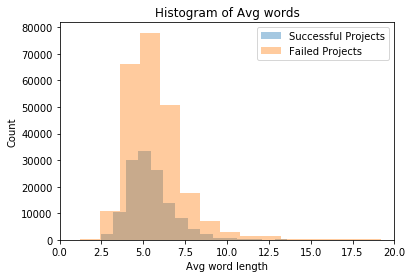

In [67]:
sns.distplot(sub_df.query('state != "0"')['avg_word'],  bins = 50, kde = False, label="Successful Projects").set(xlim=(0, 20))
sns.distplot(sub_df.query('state != "1"')['avg_word'],  bins = 50, kde = False, label="Failed Projects").set(xlim=(0, 20))
plt.title('Histogram of Avg words')
plt.legend(loc='upper right')
plt.xlabel('Avg word length')
plt.ylabel('Count')
plt.show()

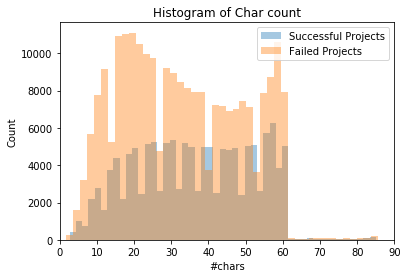

In [71]:
sns.distplot(sub_df.query('state != "0"')['char_count'],  bins = 50, kde = False, label="Successful Projects").set(xlim=(0, 90))
sns.distplot(sub_df.query('state != "1"')['char_count'],  bins = 50, kde = False, label="Failed Projects").set(xlim=(0, 90))
plt.title('Histogram of Char count')
plt.legend(loc='upper right')
plt.xlabel('#chars')
plt.ylabel('Count')
plt.show()

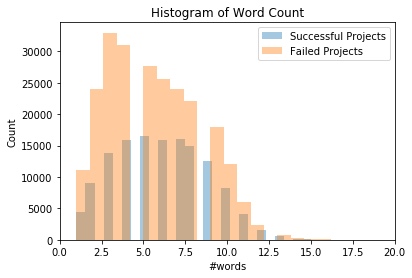

In [74]:
sns.distplot(sub_df.query('state != "0"')['word_count'],  bins = 50, kde = False, label="Successful Projects").set(xlim=(0, 20))
sns.distplot(sub_df.query('state != "1"')['word_count'],  bins = 50, kde = False, label="Failed Projects").set(xlim=(0, 20))
plt.title('Histogram of Word Count')
plt.legend(loc='upper right')
plt.xlabel('#words')
plt.ylabel('Count')
plt.show()

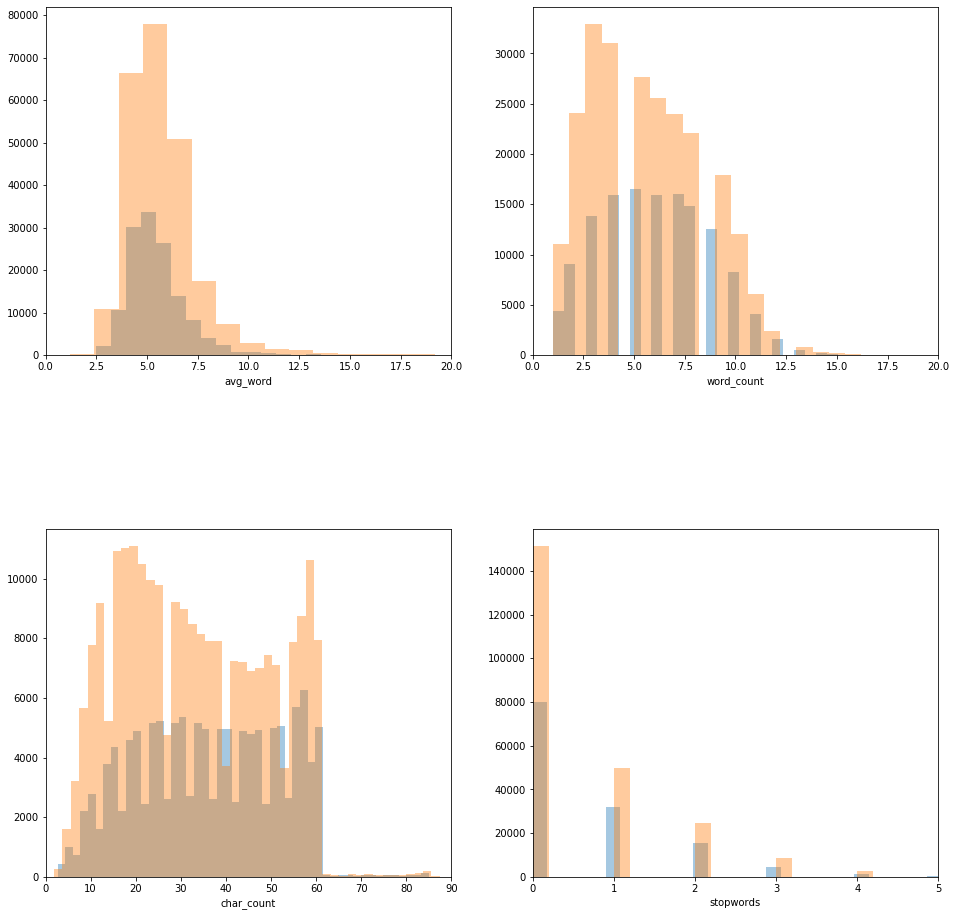

In [88]:
fig, axes = plt.subplots(2,2,figsize=(16,16))
fig.subplots_adjust(hspace=0.5)
i=0
n=4
nlp_vars = ["avg_word","word_count","char_count","stopwords"]
max_x = {"avg_word":20, "word_count":20, "char_count":90, "stopwords":5}
for variable in nlp_vars:
    r=int(i/2)
    c=i%2
    i+=1
    sns.distplot(sub_df.query('state != "0"')[variable],  bins = 50, kde = False,ax=axes[r,c], label="Successful Projects").set(xlim=(0, max_x[variable]))
    sns.distplot(sub_df.query('state != "1"')[variable],  bins = 50, kde = False,ax=axes[r,c], label="Failed Projects").set(xlim=(0, max_x[variable]))